In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt_style_dir = 'stash/'
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'pp2latex.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# params
cee = 299792458
L = .165
FSR = cee/(2*L)
del_f = .0001
w = np.arange(.5+del_f,1.5,del_f)*FSR
exp = np.exp(1j*(2*np.pi*w/FSR))

In [3]:
# Cavity reflection coefficient (critically coupled cavity)
r = .9 # mirror reflectivity coefficient
F_w_cc = r*(exp-1)/(1-(r**2)*exp)  ## critically coupled cavity
F_w_cc_modsq = F_w_cc.real**2 + F_w_cc.imag**2 # Modulus squared

In [4]:
# Cavity reflection coefficient (generally coupled cavity)
r_1 = .95
r_2 = .95
L = 0
t_1 = (1-r_1*r_2-L)**.5
F_w_gen = (-r_1 + r_2*(r_1**2 + t_1**2)*exp)/(1-r_1*r_2*exp)
F_w_gen_modsq = F_w_gen.real**2 + F_w_gen.imag**2 # Modulus squared

Text(0, 0.5, 'phase [deg]')

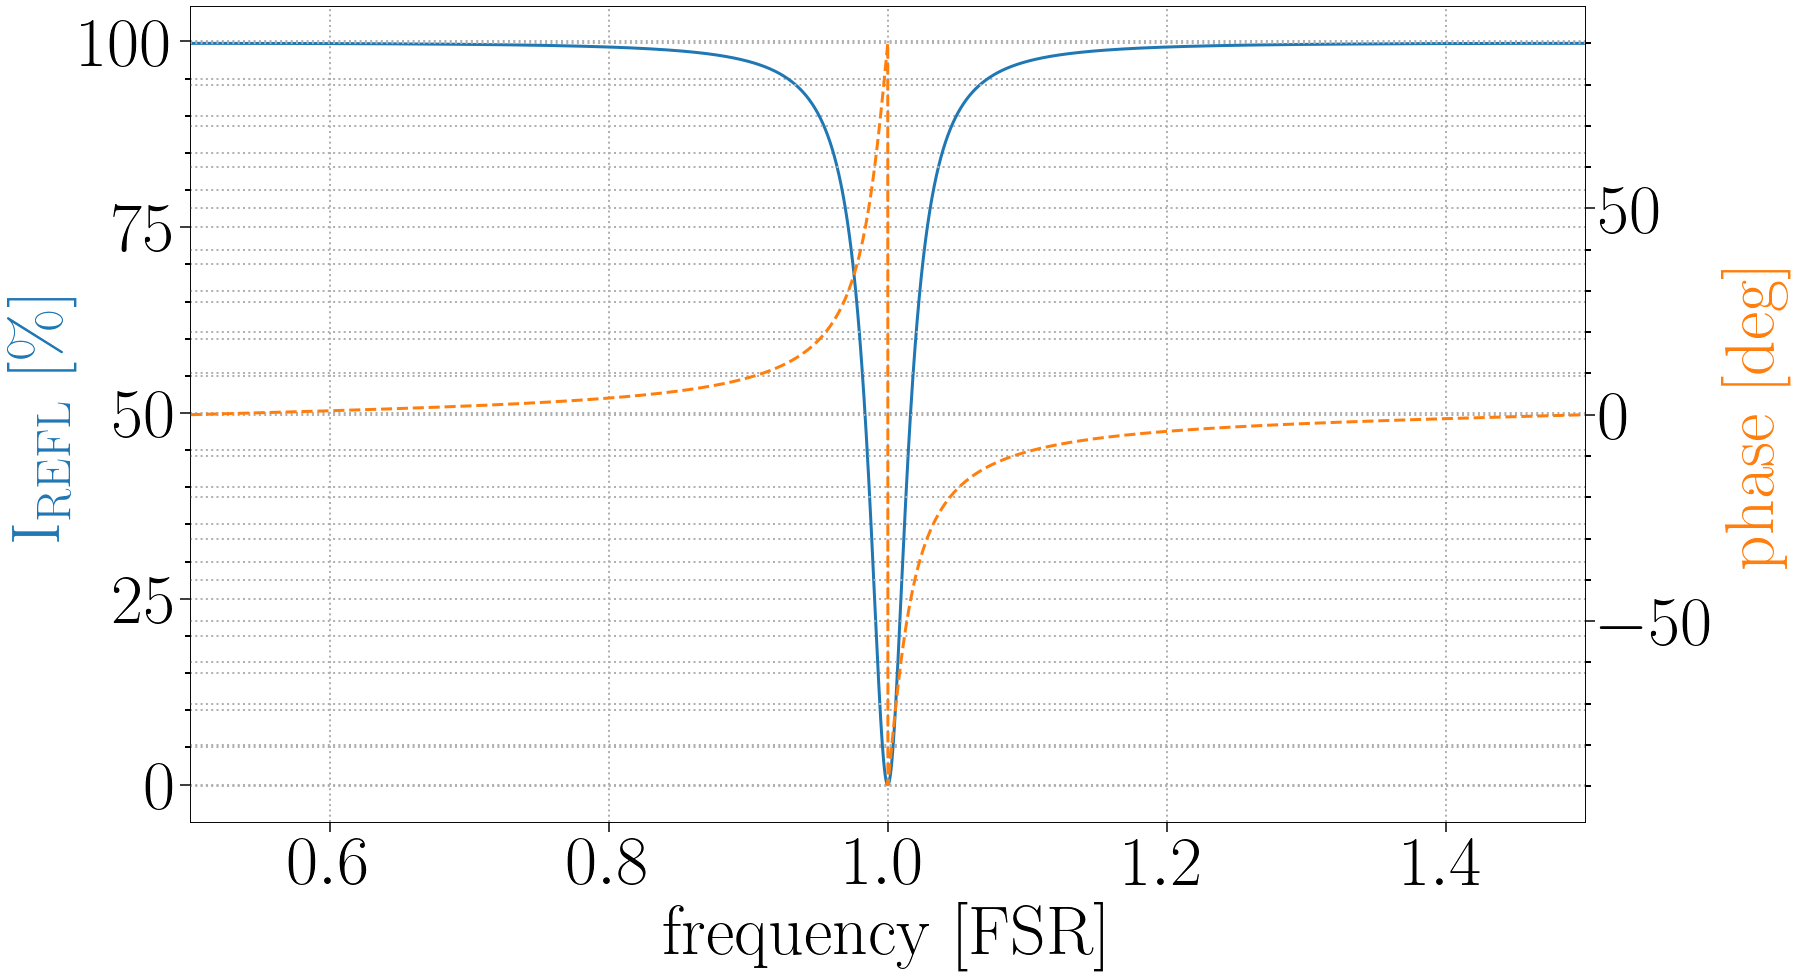

In [6]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequency [FSR]')
ax1.set_ylabel('I$_\mathrm{REFL}$ [\%]', color='C0')
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
ax1.plot(w/(FSR), F_w_gen_modsq*100, color='C0')
ax2 = ax1.twinx()
#ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '--')
ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_gen.imag/F_w_gen.real), '--', color='C1')
#plt.xlabel('frequency [FSR]')
plt.xlim([w[0]/FSR,w[-1]/FSR])
plt.ylabel('phase [deg]', color='C1')

In [7]:
fig.savefig('../figs/ALGAAS/REFL_cav_intensity.pdf', dpi=300, bbox_inches='tight')

Text(0.5, 0, 'frequency [FSR]')

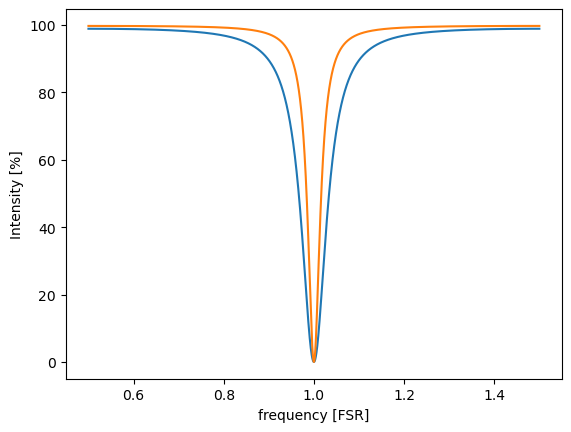

In [5]:
#plt.plot(w/(FSR), F_w_cc_modsq*100)
#plt.plot(w/(FSR), F_w_gen_modsq*100)
#plt.ylabel('Intensity [%]')
#plt.xlabel('frequency [FSR]')

Text(0, 0.5, 'phase [deg]')

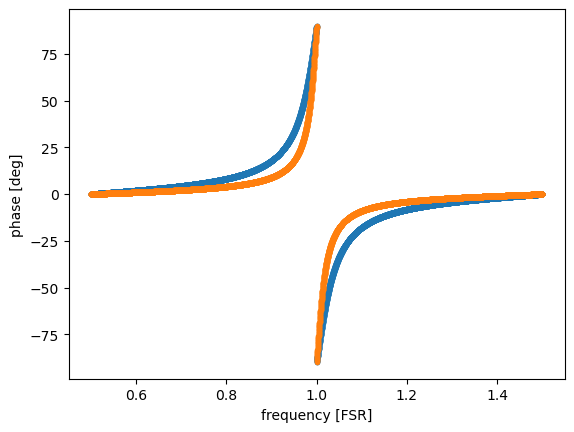

In [6]:
plt.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '.')
plt.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_gen.imag/F_w_gen.real), '.')
plt.xlabel('frequency [FSR]')
plt.ylabel('phase [deg]')